# **Custom Neural Network**
---
We want to train a neural network once to imitate formula_1 and
another time to imitate formula_2. The goal is to observe how the parameters within
the neural network are transformed through the training process.

Below the implementation of the neural network class there is
defined a function execute_nn which instantiates the neural network class and shall train
it over 100 epochs. Thus, a dataset is used 100 times to train the neural network. After
the training, the parameters (weights and bias) of the neural network instance should
be printed and the error curve over the epochs should be plotted in logarithmic scale.
Furthermore, the target data and the data as outputted by the final neural network is
shown in a scatter plot. Since the input data is generated randomly, you may expect
different plots for every execution of the notebook. The whole function is called twice,
one time for each dataset.



In [34]:
#import important libraries and packages
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [35]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [28]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 1.03543153],
       [-0.21357228],
       [-0.11403546],
       ...,
       [ 0.83684826],
       [ 0.83458145],
       [-0.20610488]])

In [29]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[1.78543153],
       [0.53642772],
       [0.63596454],
       ...,
       [1.58684826],
       [1.58458145],
       [0.54389512]])

In [30]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.36008258],
       [0.28804764],
       [0.38621153],
       ...,
       [1.24253575],
       [1.24101552],
       [0.29535122]])

Task 1:
**Implement the feed-forward pass method feed_forward of the neural
network and store the outcome values in the corresponding members. Also, compute
the error in regard to the target value and store it in the corresponding member.
Consider following loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2**

Task 2: 

*** ***

**Implement the back-propagation pass method back_prop of the neural
network. Update the parameters (weights and bias) of the neural network accordingly
with a learning rate of 0.01.**

Task 3: 

**Implement stochastic gradient descent to be performed in each epoch.
Stochastic gradient descent means that the dataset is shuffled in the beginning of an
epoch and the neural network instance is trained with each sample from the dataset
by execution of feed-forward and back-propagation pass. In addition, store the mean
error of each epoch of the neural network instance in epoch_error, so the error curve
is plotted after all epochs are done.**

Imitation of formula 'x+0.75'
Weight_1:1.98814515814793
Weight_2:2.358843310482302
Bias:-0.8357623453510913


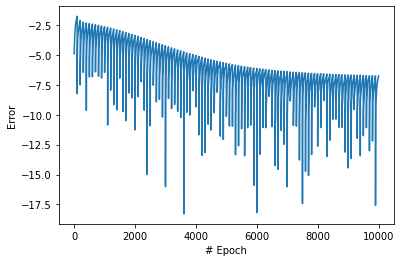

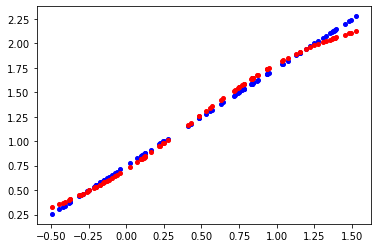


Imitation of formula 'sin(x)+0.5'
Weight_1:2.255095873382377
Weight_2:1.6311766115868296
Bias:-0.7836296034652807


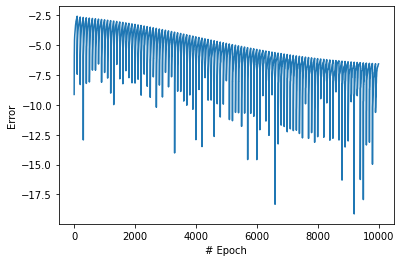

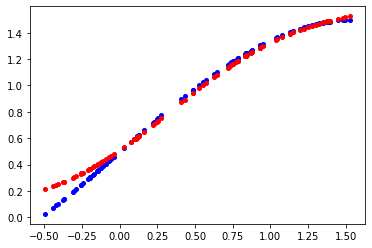

In [33]:
import math
# Activation function and its derivative
sigmoid = lambda x: 1/(1 + math.exp(-x))
sigmoid_derivative = lambda x: sigmoid(x) * (1 - sigmoid(x))

# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # (a) Feed-forward pass
    def feed_forward(self):
      # Compute input of the hidden layer and apply sigmoid on it
      self.hidden = sigmoid(self.X * self.weight_1 + self.bias)
      # Compute out of the neural network
      self.output = self.hidden * self.weight_2
      # Compute error
      self.error = 0.5 * (self.y - self.output)**2
        
       
    # (b) Back-propagation pass
    def back_prop(self):
      # Compute derivatives
      # d error / d weight_2 = (d error / d output) * (d output / d weight_2)

      error_derivative_output = (self.y - self.output) * (-1)
      output_derivative_weight_2 = self.hidden

      error_derivative_weight_2 = error_derivative_output * output_derivative_weight_2

      # d error / d weight_1 = (d error / d output) * (d output / d hidden) *(d hidden / d sigmoid_argument) * (d sigmoid_argument / d weight_1)
# = (d error / d sigmoid_argument) * (d sigmoid_argument / d weight_1)
      output_derivative_hidden = self.weight_2
      hidden_derivative_sigmoid_argument = sigmoid_derivative(self.X * self.weight_1 + self.bias)
      
      sigmoid_argument_derivative_weight_1 = self.X
      error_derivative_sigmoid_argument = error_derivative_output * output_derivative_hidden * hidden_derivative_sigmoid_argument
      
      error_derivative_weight_1 = error_derivative_sigmoid_argument * sigmoid_argument_derivative_weight_1

      # d error / d bias = (d error / d output) * (d output / d hidden) * (d hidden / d sigmoid_argument) * (d sigmoid_argument / d bias)
      # = (d error / d sigmoid_argument) * (d sigmoid_argument / d bias)

      sigmoid_argument_derivative_bias = 1
      
      error_derivative_bias = error_derivative_sigmoid_argument * sigmoid_argument_derivative_bias


      # Update parameters with a learning rate of 0.01
      self.weight_1 = self.weight_1 - 0.01 * error_derivative_weight_1
      self.weight_2 = self.weight_2 - 0.01 * error_derivative_weight_2
      self.bias = self.bias - 0.01 * error_derivative_bias


       
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Combine input and target data into a single dataset (= value pairs) to shuffle it later
    dataset = np.hstack([X,y])

    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):
      np.random.shuffle(dataset) # Shuffle dataset
      # (c) Perform stochastic gradient descent and train neural network. Remember final error of each epoch in "epoch_error"
      
      error_sum = 0 # Store sum of all errors to compute mean later
      for i in range(0, dataset.shape[0]):
        nn.set_sample(dataset[i][0], dataset[i][1])
        nn.feed_forward()
        error_sum += nn.error # Accumulate error
        nn.back_prop()
        
        # Calculate mean error (= error of the current epoch) and add it to thelist

        epoch_error.append( error_sum / dataset.shape[0] )




        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)